Upload the excel file


Import needed libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



Reading the data

In [ ]:
data = pd.read_csv('billionaires.csv')

print(data.head())

             name  rank  year  company.founded        company.name  \
0      Bill Gates     1  1996             1975           Microsoft   
1      Bill Gates     1  2001             1975           Microsoft   
2      Bill Gates     1  2014             1975           Microsoft   
3  Warren Buffett     2  1996             1962  Berkshire Hathaway   
4  Warren Buffett     2  2001             1962  Berkshire Hathaway   

  company.relationship company.sector company.type  demographics.age  \
0              founder       Software          new                40   
1              founder       Software          new                45   
2              founder       Software          new                58   
3              founder        Finance          new                65   
4              founder        Finance          new                70   

  demographics.gender  ...  location.gdp location.region          wealth.type  \
0                male  ...  8.100000e+12   North America  founder

In [ ]:
print(data.shape)

(2614, 22)


In [ ]:
print(data.size)

57508


In [ ]:
print(data.columns)
# print(data.keys())

Index(['name', 'rank', 'year', 'company.founded', 'company.name',
       'company.relationship', 'company.sector', 'company.type',
       'demographics.age', 'demographics.gender', 'location.citizenship',
       'location.country code', 'location.gdp', 'location.region',
       'wealth.type', 'wealth.worth in billions', 'wealth.how.category',
       'wealth.how.from emerging', 'wealth.how.industry',
       'wealth.how.inherited', 'wealth.how.was founder',
       'wealth.how.was political'],
      dtype='object')


In [ ]:
print(data.keys())

Index(['name', 'rank', 'year', 'company.founded', 'company.name',
       'company.relationship', 'company.sector', 'company.type',
       'demographics.age', 'demographics.gender', 'location.citizenship',
       'location.country code', 'location.gdp', 'location.region',
       'wealth.type', 'wealth.worth in billions', 'wealth.how.category',
       'wealth.how.from emerging', 'wealth.how.industry',
       'wealth.how.inherited', 'wealth.how.was founder',
       'wealth.how.was political'],
      dtype='object')


In [ ]:
print(data.index)

RangeIndex(start=0, stop=2614, step=1)


In [ ]:
print(data.dtypes)

name                         object
rank                          int64
year                          int64
company.founded               int64
company.name                 object
company.relationship         object
company.sector               object
company.type                 object
demographics.age              int64
demographics.gender          object
location.citizenship         object
location.country code        object
location.gdp                float64
location.region              object
wealth.type                  object
wealth.worth in billions    float64
wealth.how.category          object
wealth.how.from emerging       bool
wealth.how.industry          object
wealth.how.inherited         object
wealth.how.was founder         bool
wealth.how.was political       bool
dtype: object


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2614 non-null   object 
 1   rank                      2614 non-null   int64  
 2   year                      2614 non-null   int64  
 3   company.founded           2614 non-null   int64  
 4   company.name              2576 non-null   object 
 5   company.relationship      2568 non-null   object 
 6   company.sector            2591 non-null   object 
 7   company.type              2578 non-null   object 
 8   demographics.age          2614 non-null   int64  
 9   demographics.gender       2580 non-null   object 
 10  location.citizenship      2614 non-null   object 
 11  location.country code     2614 non-null   object 
 12  location.gdp              2614 non-null   float64
 13  location.region           2614 non-null   object 
 14  wealth.t

In [ ]:
count = 0
for column in data.columns:
   count += data[column].isnull().sum()

print(count)
print(data.isnull().sum())

0
name                        0
rank                        0
year                        0
company.founded             0
company.name                0
company.relationship        0
company.sector              0
company.type                0
demographics.age            0
demographics.gender         0
location.citizenship        0
location.country code       0
location.gdp                0
location.region             0
wealth.type                 0
wealth.worth in billions    0
wealth.how.category         0
wealth.how.from emerging    0
wealth.how.industry         0
wealth.how.inherited        0
wealth.how.was founder      0
wealth.how.was political    0
dtype: int64


In [ ]:
empty = (list(filter(lambda column: data[column].isnull().sum()>0, data.columns)))
print(empty)


['company.name', 'company.relationship', 'company.sector', 'company.type', 'demographics.gender', 'wealth.type', 'wealth.how.category', 'wealth.how.industry']


Dropping Null values

In [ ]:
data = data.dropna(axis = 0, how = 'any')


In [ ]:
empty = (list(filter(lambda column: data[column].isnull().sum()>0, data.columns)))
print(empty)

[]


In [ ]:
print(any(data.duplicated()))
data.duplicated().sum()

False


0

types


In [ ]:
for column in data.columns:
  try:
      data[column] = data[column].astype(type(data.loc[0,column]))

  except ValueError:
      print(column)

In [ ]:
print("Mean of worth:", data['wealth.worth in billions'].mean())
print("Median of worth:", data['wealth.worth in billions'].median())
print("Mode of worth:", data['wealth.worth in billions'].mode())

Mean of worth: 3.565261914139425
Median of worth: 2.0
Mode of worth: 0    1.1
Name: wealth.worth in billions, dtype: float64


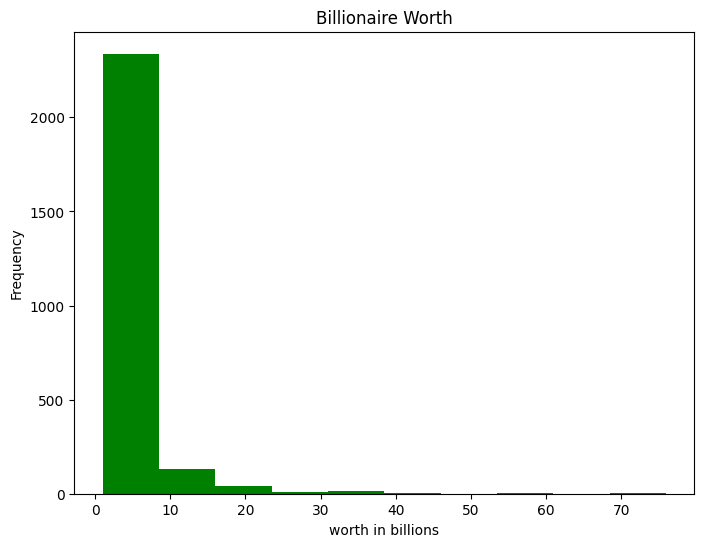

In [ ]:
plt.figure(figsize =(8,6))
plt.hist(data['wealth.worth in billions'], bins=10,color = 'green')
plt.xlabel('worth in billions')
plt.ylabel('Frequency')
plt.title('Billionaire Worth')
plt.show()


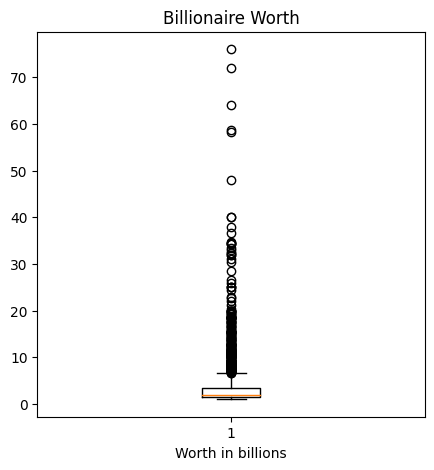

In [ ]:
plt.figure(figsize = (5,5))
plt.boxplot(data['wealth.worth in billions'])
plt.xlabel('Worth in billions')
plt.title('Billionaire Worth')
plt.show()

Question number 1:

In [ ]:
grouped = data.groupby(['location.citizenship','name']).groups.items()
countries_billionaires = {}
for item in grouped:
  if item[0][0] not in countries_billionaires:
    countries_billionaires[item[0][0]] = 0
  countries_billionaires[item[0][0]]+= 1
print(countries_billionaires)

{'Algeria': 1, 'Angola': 1, 'Argentina': 8, 'Australia': 30, 'Austria': 10, 'Bahrain': 1, 'Belgium': 3, 'Bermuda': 1, 'Brazil': 71, 'Canada': 45, 'Chile': 14, 'China': 151, 'Colombia': 6, 'Cyprus': 4, 'Czech Republic': 6, 'Denmark': 7, 'Ecuador': 1, 'Egypt': 8, 'Finland': 4, 'France': 53, 'Georgia': 1, 'Germany': 104, 'Greece': 7, 'Guernsey': 1, 'Hong Kong': 59, 'India': 57, 'Indonesia': 25, 'Ireland': 7, 'Israel': 22, 'Italy': 44, 'Japan': 54, 'Kazakhstan': 5, 'Kuwait': 6, 'Lebanon': 8, 'Liechtenstein': 1, 'Lithuania': 1, 'Macau': 2, 'Malaysia': 17, 'Mexico': 25, 'Monaco': 1, 'Morocco': 4, 'Nepal': 1, 'Netherlands': 9, 'New Zealand': 3, 'Nigeria': 4, 'Norway': 10, 'Oman': 2, 'Peru': 8, 'Philippines': 15, 'Poland': 5, 'Portugal': 4, 'Romania': 1, 'Russia': 112, 'Saudi Arabia': 14, 'Singapore': 20, 'South Africa': 9, 'South Korea': 30, 'Spain': 32, 'St. Kitts and Nevis': 1, 'Swaziland': 1, 'Sweden': 20, 'Switzerland': 36, 'Taiwan': 33, 'Tanzania': 1, 'Thailand': 18, 'Turkey': 26, 'Ugand

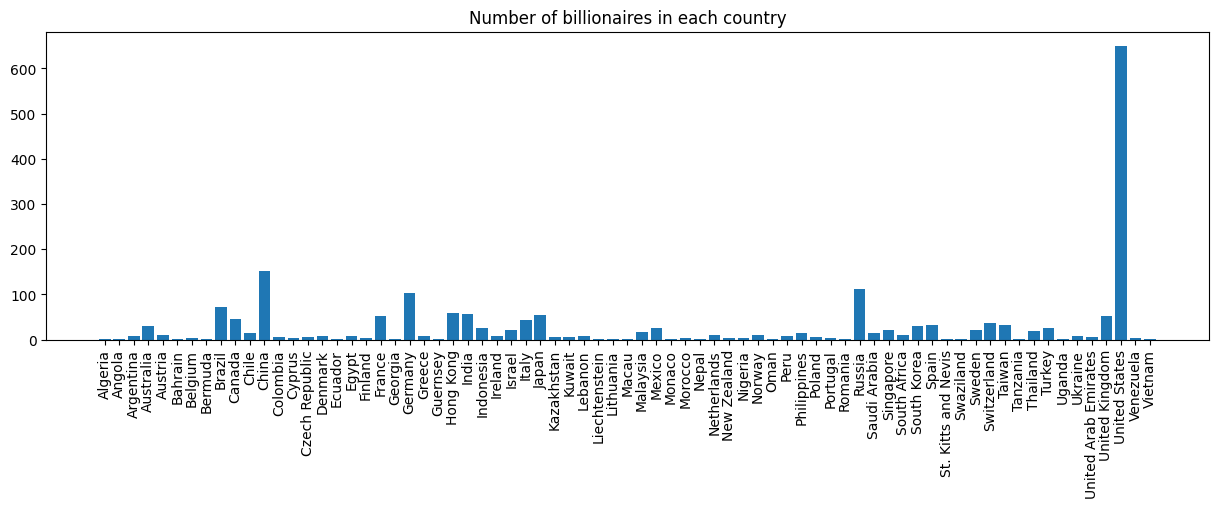

In [ ]:
plt.figure(figsize = (15,4))
plt.bar(list(countries_billionaires.keys()),list(countries_billionaires.values()))
plt.xticks(rotation=90)
plt.title('Number of billionaires in each country')
plt.show()

10 most

In [ ]:
Ten_most_countries_billionaires = sorted(countries_billionaires.items(),key = lambda item:item[1],reverse = True)[0:10]
print(Ten_most_countries_billionaires)



[('United States', 649), ('China', 151), ('Russia', 112), ('Germany', 104), ('Brazil', 71), ('Hong Kong', 59), ('India', 57), ('Japan', 54), ('France', 53), ('United Kingdom', 53)]


graph of TEN

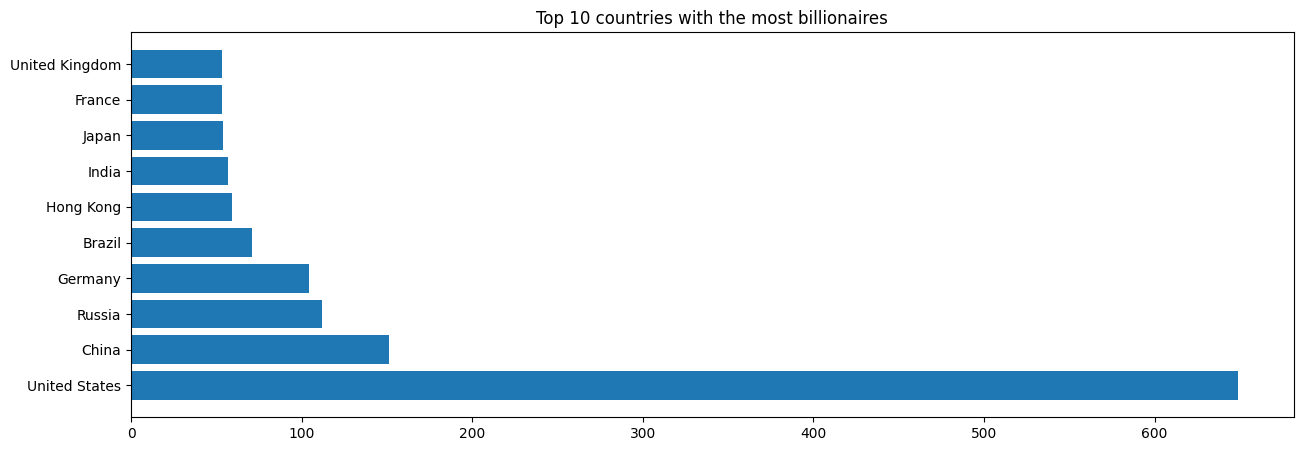

In [ ]:
plt.figure(figsize=(15,5))
plt.barh([item[0] for item in Ten_most_countries_billionaires], [item[1] for item in Ten_most_countries_billionaires])
plt.title('Top 10 countries with the most billionaires')
plt.show()


question 2

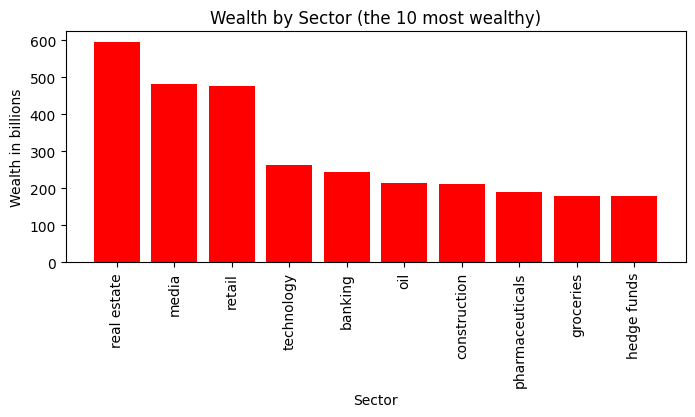

In [ ]:
sector_wealth = data.groupby('company.sector')['wealth.worth in billions'].sum()
sector_wealth_most = sector_wealth.sort_values(ascending=False).head(10)
plt.figure(figsize=(8,3))
plt.bar(x=sector_wealth_most.index, height=sector_wealth_most.values, color = 'red')
plt.xticks(rotation=90)
plt.xlabel('Sector')
plt.ylabel('Wealth in billions')
plt.title('Wealth by Sector (the 10 most wealthy)')
plt.show()

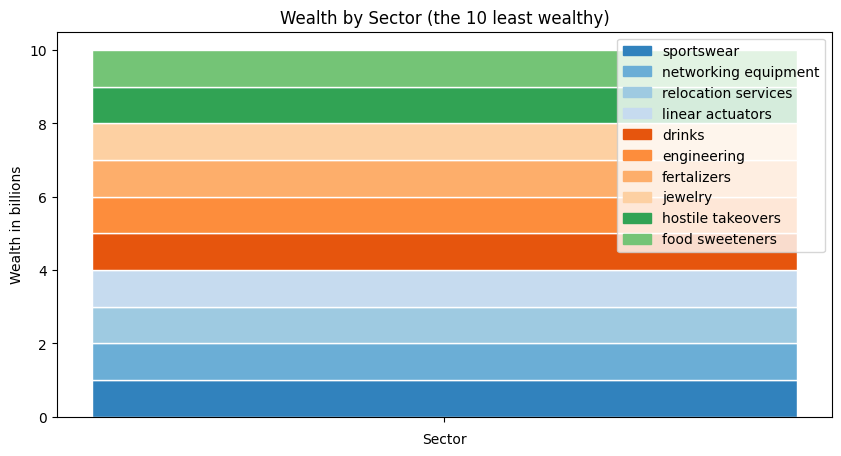

In [ ]:
sector_wealth_least = sector_wealth.sort_values().head(10)
labels = sector_wealth_least.index
values = sector_wealth_least.values.reshape(1, -1)
colors = plt.cm.tab20c.colors[:len(labels)]
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x=1, height=1, width=0.5, bottom=0, color=colors, edgecolor='white')
for i, (colname, color) in enumerate(zip(labels, colors)):
    ax.bar(x=1, height=values[0, i], width=0.5, bottom=values[0, :i].sum(), color=color, edgecolor='white')
ax.set_xlabel('Sector')
ax.set_ylabel('Wealth in billions')
ax.set_xticks([1])
ax.set_xticklabels([''])
ax.set_title('Wealth by Sector (the 10 least wealthy)')
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
ax.legend(handles, labels)
plt.show()

industries

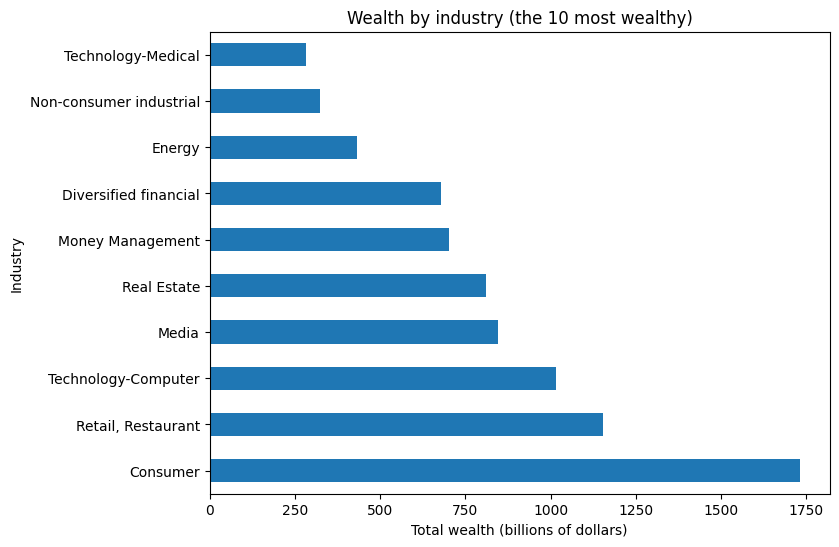

wealth.how.industry
Consumer                   1731.4
Retail, Restaurant         1153.3
Technology-Computer        1015.2
Media                       844.9
Real Estate                 809.8
Money Management            702.4
Diversified financial       678.2
Energy                      433.3
Non-consumer industrial     323.6
Technology-Medical          283.7
Name: wealth.worth in billions, dtype: float64


In [ ]:
data_here = data.copy()
data_here = data_here[data_here['wealth.how.industry'].apply(lambda x: len(x)>=4)]


industries_wealth = data_here.groupby('wealth.how.industry')['wealth.worth in billions'].sum()
industries_wealth_most = industries_wealth.sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(8, 6))
industries_wealth_most.plot(kind='barh', stacked=True, ax=ax)
ax.set_xlabel('Total wealth (billions of dollars)')
ax.set_ylabel('Industry')
ax.set_title('Wealth by industry (the 10 most wealthy)')
plt.show()
print(industries_wealth_most)

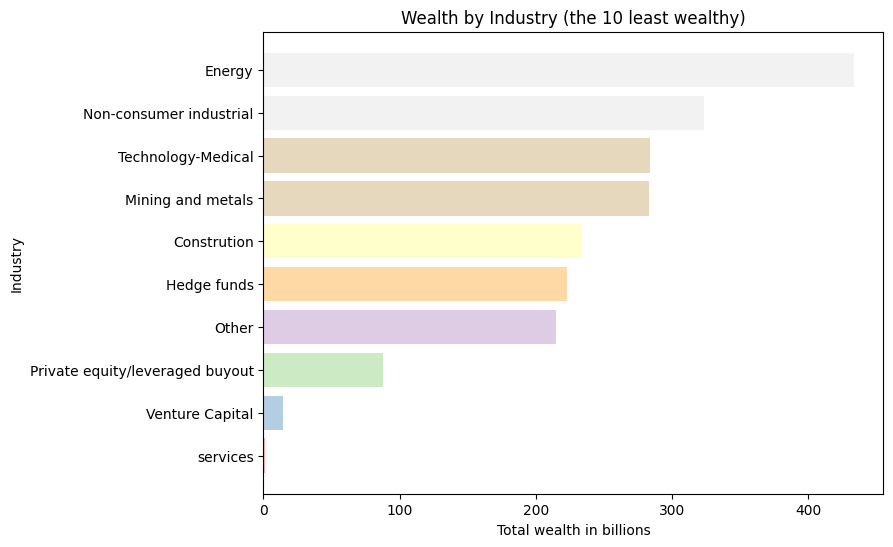

wealth.how.industry
services                             1.2
Venture Capital                     14.2
Private equity/leveraged buyout     87.9
Other                              214.5
Hedge funds                        222.8
Constrution                        234.0
Mining and metals                  282.8
Technology-Medical                 283.7
Non-consumer industrial            323.6
Energy                             433.3
Name: wealth.worth in billions, dtype: float64


In [ ]:
industries_wealth_least = industries_wealth.sort_values().head(10)
plt.figure(figsize=(8,6))
colors = plt.cm.Pastel1(np.linspace(0, 1, len(industries_wealth_least)))
plt.barh(industries_wealth_least.index, industries_wealth_least.values, color=colors)
plt.title('Wealth by Industry (the 10 least wealthy)')
plt.xlabel('Total wealth in billions')
plt.ylabel('Industry')
plt.show()
print(industries_wealth_least)

graphs

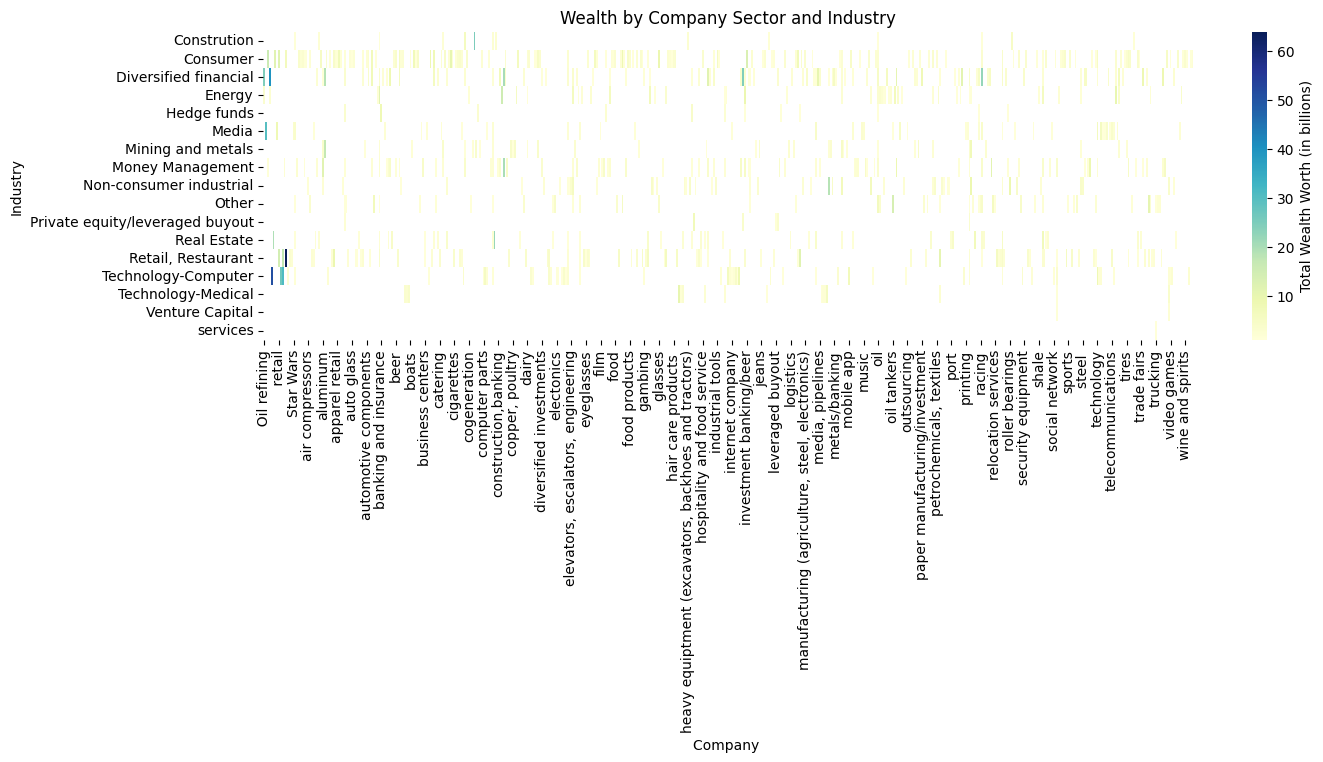

In [ ]:
import seaborn as sns


heatmap = pd.pivot_table(data_here, values='wealth.worth in billions', index=['wealth.how.industry'], columns=['company.sector'])
plt.figure(figsize=(15, 4))
sns.heatmap(heatmap, cmap='YlGnBu', cbar_kws={'label': 'Total Wealth Worth (in billions)'})
plt.title('Wealth by Company Sector and Industry')
plt.xlabel('Company ')
plt.ylabel('Industry')
plt.show()

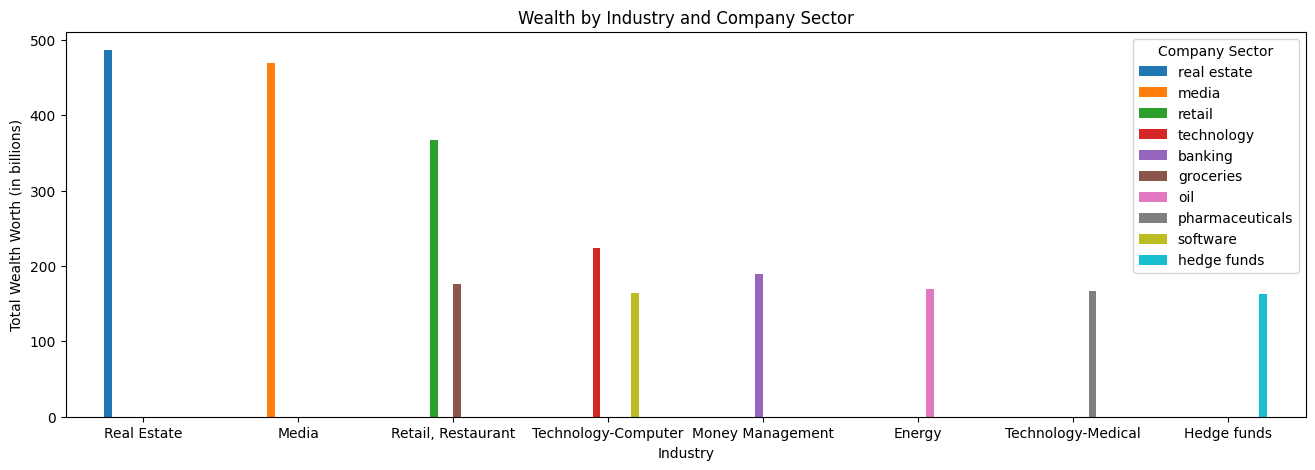

In [ ]:
industry_sector = data.groupby(['wealth.how.industry', 'company.sector'])['wealth.worth in billions'].sum()
industry_sector = industry_sector.sort_values(ascending=False).head(10)
industry_sector = industry_sector.unstack(level=1)

ax = industry_sector.plot(kind='bar', figsize=(16,5), rot=0)
ax.set_xlabel('Industry')
ax.set_ylabel('Total Wealth Worth (in billions)')
ax.set_title('Wealth by Industry and Company Sector')
ax.legend(title='Company Sector')
plt.show()

  question 3

In [ ]:
count = 0
for item in data['demographics.gender']:
  if item == 'female':
    count += 1
print(count)
female_to_all = (count/len(data['demographics.gender']))*100
print(f'the proportion of female to all the people is {female_to_all} percent')

248
the proportion of female to all the people is 9.767625049231981 percent


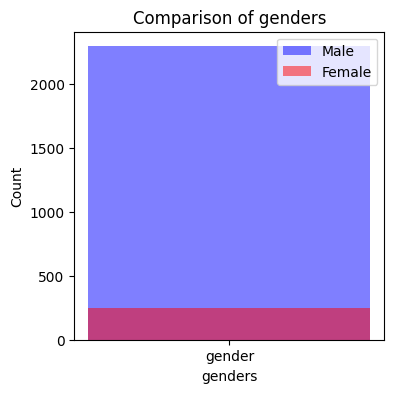

In [ ]:

plt.figure(figsize = (4,4))

plt.bar('gender', len(data['demographics.gender'])-count, color='blue', alpha=0.5, label='Male')
plt.bar('gender',count , color='red', alpha=0.5, label='Female')

plt.xlabel('genders')
plt.ylabel('Count')
plt.title('Comparison of genders')


plt.legend()
plt.show()

In [ ]:
data_female = data[data['demographics.gender'] == 'female']
female_number_sector = data_female.groupby('company.sector')['demographics.gender'].count()
print(female_number_sector)


company.sector
  Oil refining                  1
 Finance                        2
 fashion                        1
 retail                         3
advertising                     1
                               ..
transportation                  3
truck stops                     1
trucking                        1
utilities/financial services    1
video technology                1
Name: demographics.gender, Length: 101, dtype: int64


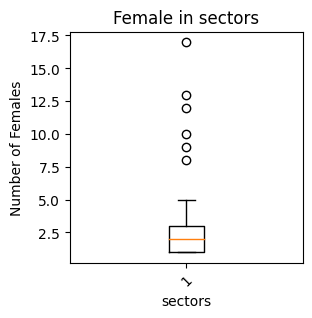

In [ ]:
plt.figure(figsize=(3,3))
plt.boxplot(female_number_sector)
plt.xticks(rotation=45)
plt.title('Female in sectors')
plt.xlabel('sectors')
plt.ylabel('Number of Females')
plt.show()

In [ ]:
female_10 = female_number_sector.sort_values(ascending = False).head(10)
print(female_10)

company.sector
retail              17
media               13
construction        12
soup                10
real estate          9
banking              8
electronics          5
medical supplies     5
pharmaceuticals      5
beer                 5
Name: demographics.gender, dtype: int64


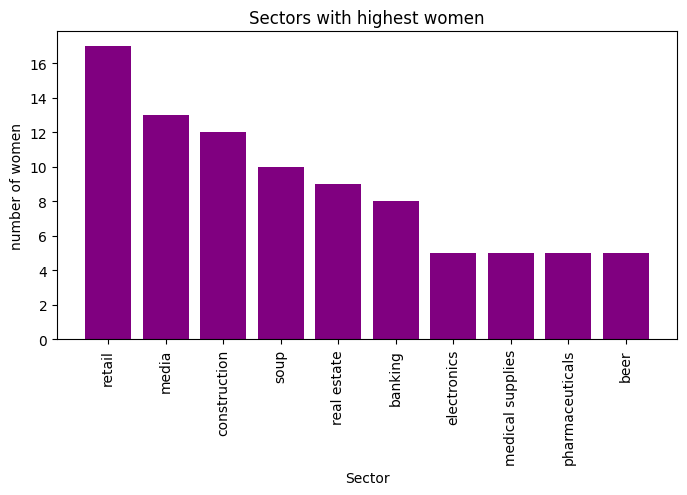

In [ ]:
plt.figure(figsize = (8,4))
plt.bar(female_10.index,female_10, color = 'purple' )

plt.title('Sectors with highest women')
plt.xlabel('Sector')
plt.xticks(rotation = 90)
plt.ylabel('number of women')


plt.show()

In [ ]:
female_number_industry = data_female.groupby('wealth.how.industry')['demographics.gender'].count()
print(female_number_industry)

wealth.how.industry
0                           1
Constrution                15
Consumer                   72
Diversified financial      12
Energy                      3
Media                      18
Mining and metals          10
Money Management           19
Non-consumer industrial    13
Other                       5
Real Estate                25
Retail, Restaurant         34
Technology-Computer        10
Technology-Medical         11
Name: demographics.gender, dtype: int64


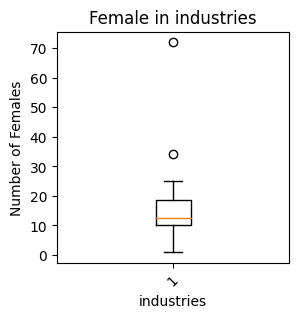

In [ ]:
plt.figure(figsize=(3,3))
plt.boxplot(female_number_industry)
plt.xticks(rotation=45)
plt.title('Female in industries')
plt.xlabel('industries')
plt.ylabel('Number of Females')
plt.show()

In [ ]:
female_10 = female_number_industry.sort_values(ascending = False).head(10)
print(female_10)

wealth.how.industry
Consumer                   72
Retail, Restaurant         34
Real Estate                25
Money Management           19
Media                      18
Constrution                15
Non-consumer industrial    13
Diversified financial      12
Technology-Medical         11
Mining and metals          10
Name: demographics.gender, dtype: int64


question 4

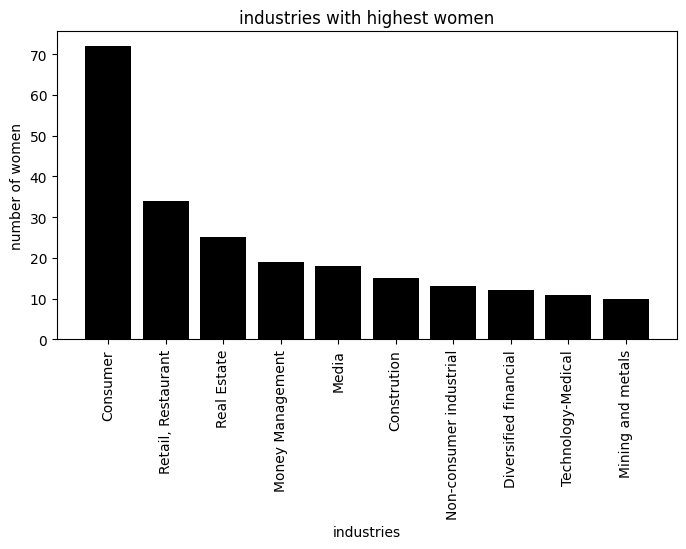

In [ ]:
plt.figure(figsize = (8,4))
plt.bar(female_10.index,female_10, color = 'black' )
plt.title('industries with highest women')
plt.xlabel('industries')
plt.xticks(rotation = 90)
plt.ylabel('number of women')
plt.show()

In [ ]:
new_data= data[data['demographics.age'] > 0]
print(new_data.shape)

age_group = new_data.groupby('demographics.age')

print(age_group.size())
print(age_group.ngroups)

(2205, 22)
demographics.age
12    1
21    1
24    2
28    2
29    4
     ..
93    4
94    3
95    2
96    2
98    1
Length: 73, dtype: int64
demographics.age
12    1
21    1
24    2
28    2
29    4
     ..
93    4
94    3
95    2
96    2
98    1
Name: demographics.age, Length: 73, dtype: int64
73


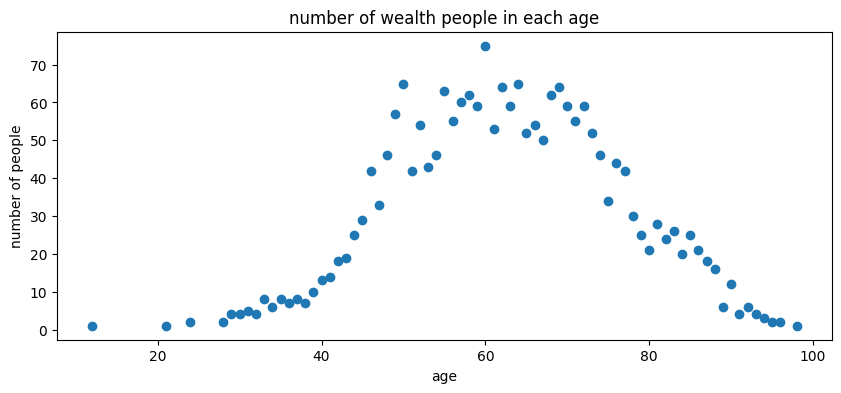

In [ ]:
plt.figure(figsize = (10,4))
plt.scatter(age_group.size().index, age_group.size().values)

plt.xlabel('age')
plt.ylabel('number of people')
plt.title('number of wealth people in each age')
plt.show()

In [ ]:
max_age =  new_data['demographics.age'].max()
min_age =  new_data['demographics.age'].min()
age_range = max_age - min_age
print(min_age)
print(max_age)
print(age_range)

12
98
86


In [ ]:
bins = [10, 20, 30, 40, 50, 60,70,80,90,100]
labels = ['10-19','20-29', '30-39', '40-49', '50-59','60-69','70,79','80,89','90,99']
new_data['age_range'] = pd.cut(new_data['demographics.age'], bins=bins, labels=labels)
age_range = new_data.groupby('age_range')
print(age_range.size())

age_range
10-19      1
20-29     13
30-39     76
40-49    348
50-59    559
60-69    582
70,79    408
80,89    196
90,99     22
dtype: int64


<ipython-input-92-a7fa6acc6942>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['age_range'] = pd.cut(new_data['demographics.age'], bins=bins, labels=labels)


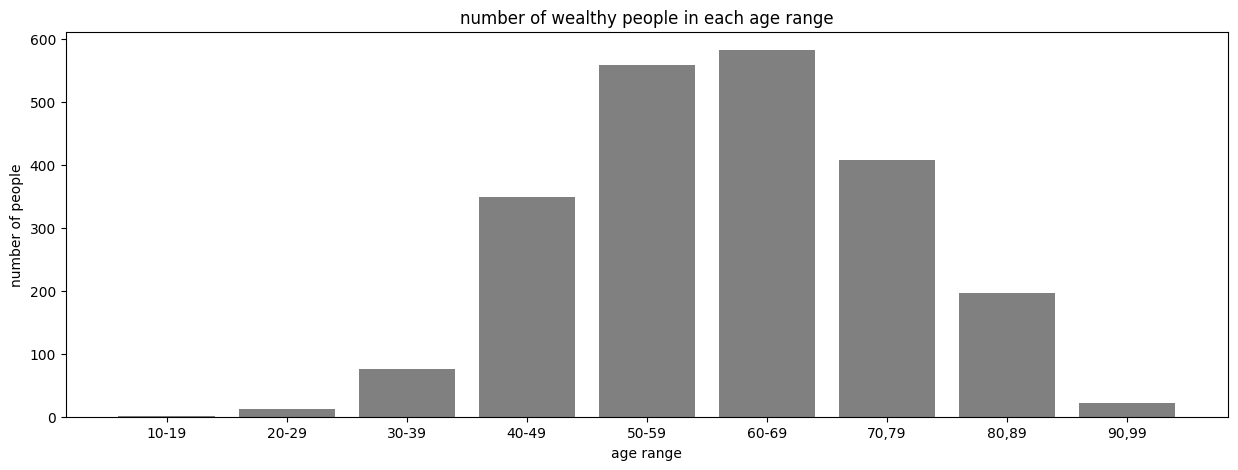

In [ ]:
plt.figure(figsize = (15,5))
plt.bar(age_range.size().index, age_range.size(), color = 'gray')
plt.title('number of wealthy people in each age range')
plt.xlabel('age range')
plt.ylabel('number of people')
plt.show()

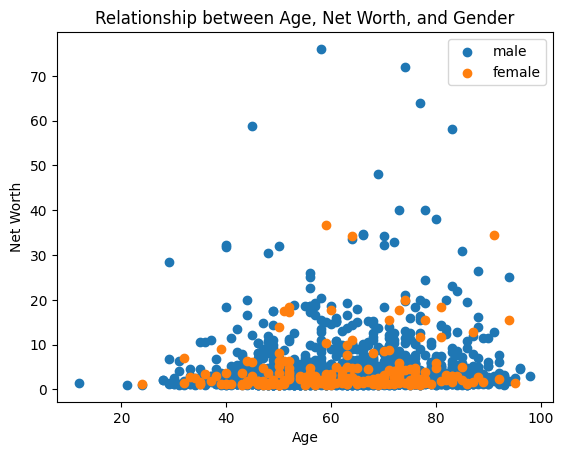

In [ ]:
# Visualize the relationship between age, net worth, and gender using a pair plot
male = new_data[new_data['demographics.gender'] == 'male']
female = new_data[new_data['demographics.gender'] == 'female']
plt.scatter(male['demographics.age'], male['wealth.worth in billions'], label='male')
plt.scatter(female['demographics.age'], female['wealth.worth in billions'], label='female')
plt.xlabel('Age')
plt.ylabel('Net Worth')
plt.title('Relationship between Age, Net Worth, and Gender')
plt.legend()
plt.show()

question 5

In [ ]:
data_inherited = data.groupby('wealth.how.inherited')
print(data_inherited.size())

wealth.how.inherited
3rd generation               205
4th generation                67
5th generation or longer      29
father                       553
not inherited               1626
spouse/widow                  59
dtype: int64


In [ ]:
data_founder = data.groupby('wealth.how.was founder')
data_political = data.groupby('wealth.how.was political')
print(data_founder.size())
print(data_political.size())
print(data.shape)

wealth.how.was founder
True    2539
dtype: int64
wealth.how.was political
True    2539
dtype: int64
(2539, 22)


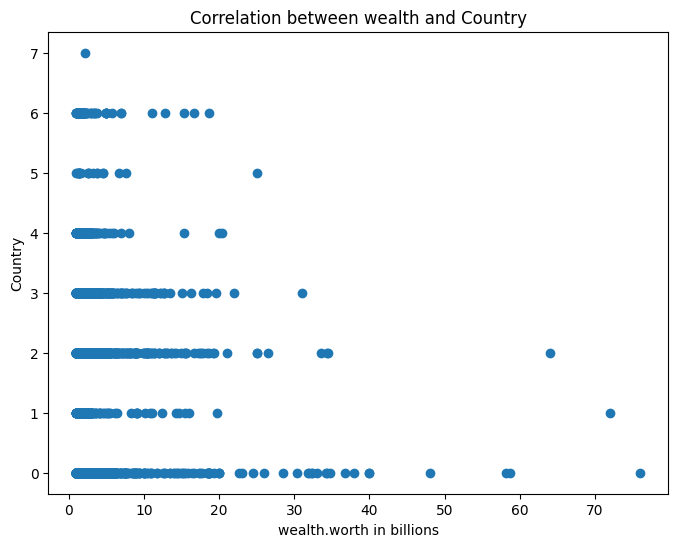

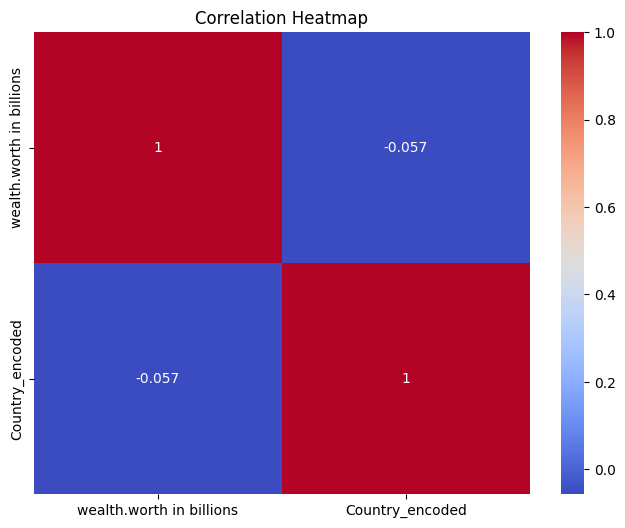



-0.03324148506862744 0.09400759061461511
 Accept the Null Hypothesis 1


In [ ]:
import scipy.stats as stats
import seaborn as sns
data['Country_encoded'] = pd.factorize(data['location.region'])[0]

corr, p_value = stats.spearmanr(data["wealth.worth in billions"], data["Country_encoded"])
subset_data = data[['wealth.worth in billions', 'Country_encoded']]

plt.figure(figsize=(8, 6))
plt.scatter(subset_data["wealth.worth in billions"], subset_data["Country_encoded"])
plt.xlabel("wealth.worth in billions")
plt.ylabel("Country")
plt.title("Correlation between wealth and Country")
plt.show()

correlation_matrix = subset_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",
            xticklabels=['wealth.worth in billions', 'Country_encoded'],
            yticklabels=['wealth.worth in billions', 'Country_encoded'])
plt.title("Correlation Heatmap")
plt.show()
print()
print()
print(corr,p_value)
if p_value < 0.05:
    print("Accept the alternative Hypothesis 1")
else:
    print(" Accept the Null Hypothesis 1")


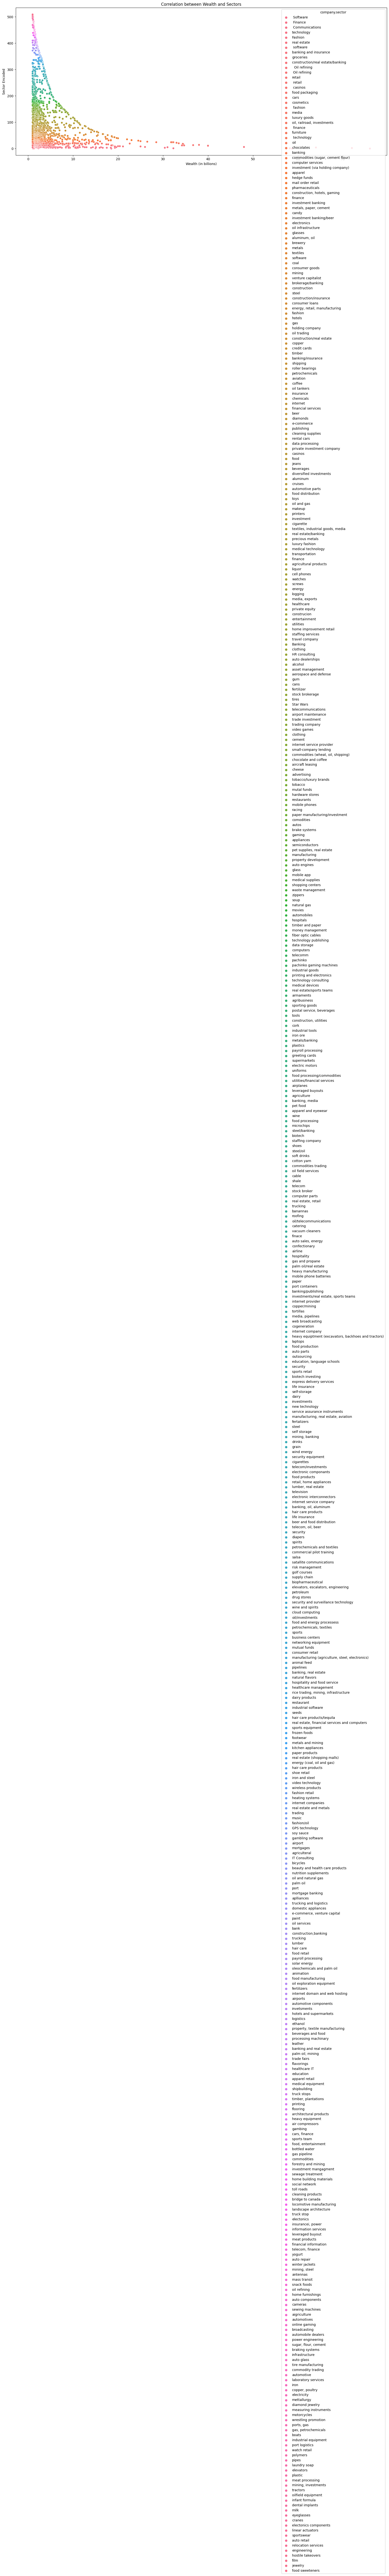




Kendall Correlation: -0.14100255784547336
p-value: 2.130213890279197e-25
Accept alternative hypothesis


In [ ]:
data['sector_encoded'] = pd.factorize(data['company.sector'])[0]
corr, p_value = stats.kendalltau(data["wealth.worth in billions"], data["sector_encoded"])

plt.figure(figsize=(20, 8))
sns.scatterplot(data=data, x="wealth.worth in billions", y="sector_encoded", hue="company.sector")
plt.xlabel("Wealth (in billions)")
plt.ylabel("Sector Encoded")
plt.title("Correlation between Wealth and Sectors")
# plt.legend(title="Sectors")
plt.show()

print()
print()
print()
print("Kendall Correlation:", corr)
print("p-value:", p_value)

if p_value < 0.05:
    print("Accept alternative hypothesis")
else:
    print("Accept null hypothesis")


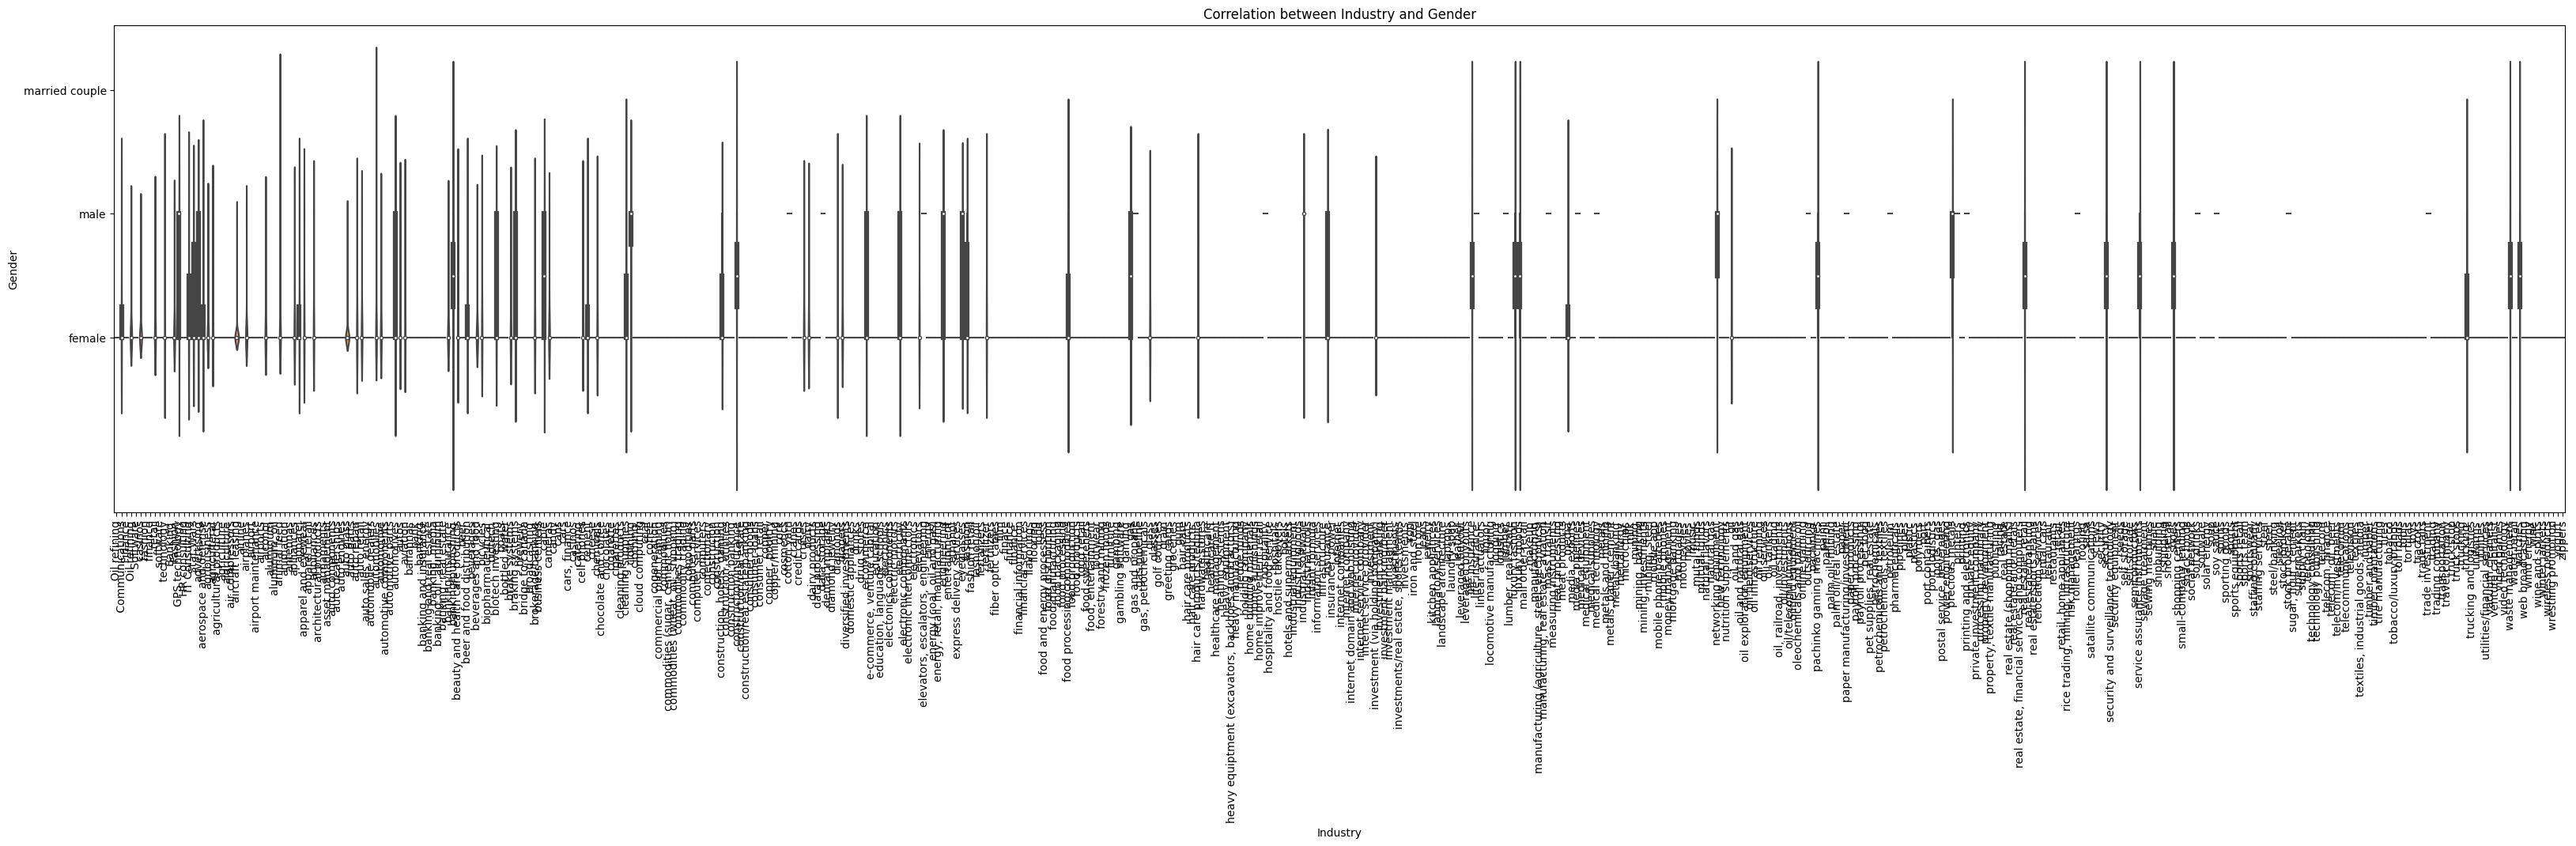




0.9999999999986935
Accept Null Hypothesis 3


In [ ]:
contingency_table = pd.crosstab(data["company.sector"], data["demographics.gender"])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

encoded_industry, _ = pd.factorize(data["company.sector"])
encoded_gender, _ = pd.factorize(data["demographics.gender"])

plt.figure(figsize=(40, 8))
sns.violinplot(x=encoded_industry, y=encoded_gender)
plt.xlabel("Industry")
plt.ylabel("Gender")
plt.title("Correlation between Industry and Gender")
plt.xticks(range(len(np.unique(encoded_industry))), np.unique(data["company.sector"]), rotation=90)
plt.yticks(range(len(np.unique(encoded_gender))), np.unique(data["demographics.gender"]))
plt.show()
plt.show()
print()
print()
print()
print(p_value)
if p_value < 0.05:
    print("Accept alternative Hypothesis 3")
else:
    print("Accept Null Hypothesis 3")

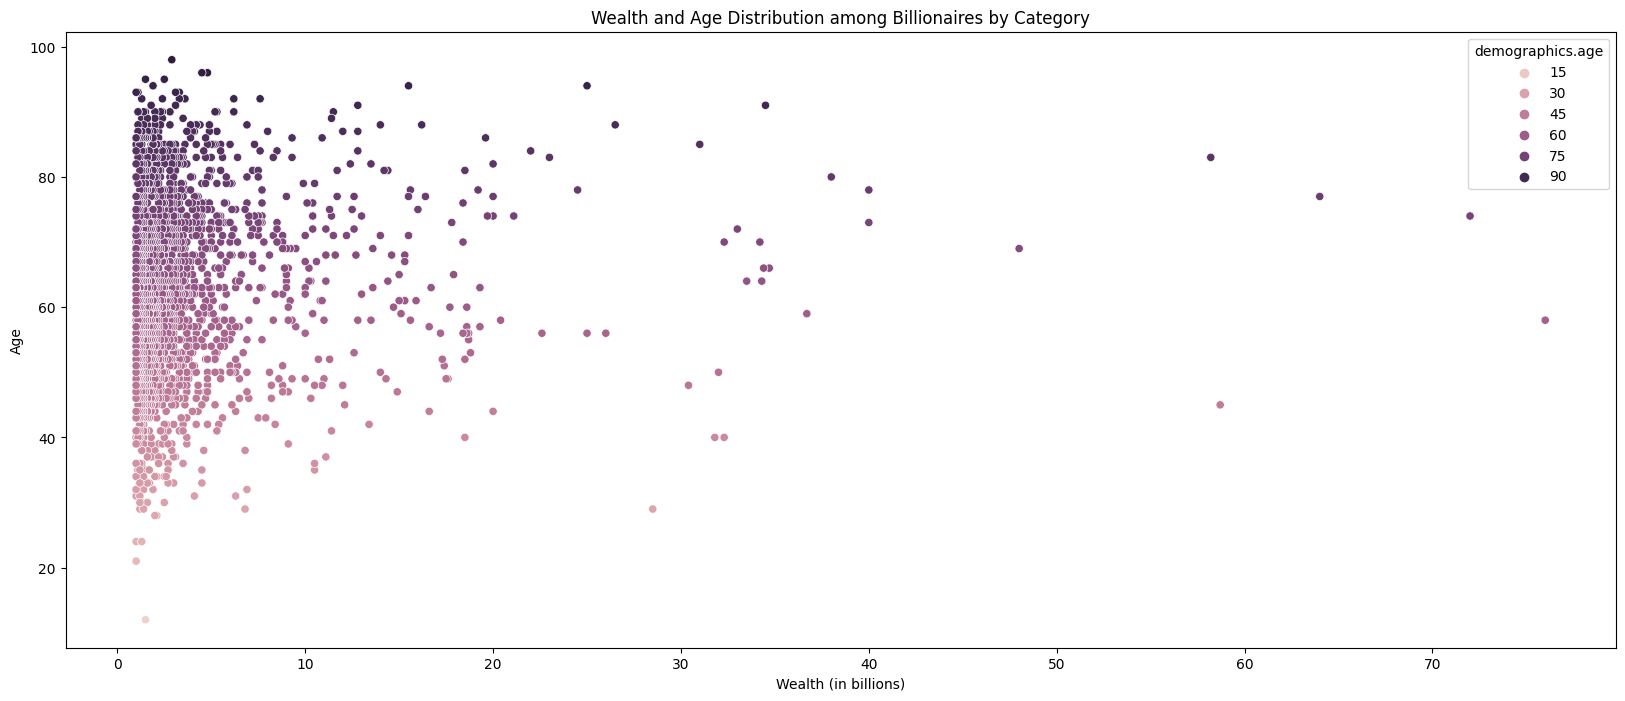



0.0
Accept alternative Hypothesis 4


In [ ]:
new_data= data[data['demographics.age'] > 0]
f_value, p_value = stats.f_oneway(new_data["demographics.age"],
                                  new_data["wealth.worth in billions"])

plt.figure(figsize=(20, 8))
sns.scatterplot(data=new_data, x="wealth.worth in billions",
                y="demographics.age", hue="demographics.age")
plt.xlabel("Wealth (in billions)")
plt.ylabel("Age")
plt.title("Wealth and Age Distribution among Billionaires by Category")
plt.show()
print()
print()
print(p_value)
if p_value < 0.05:
    print("Accept alternative Hypothesis 4")
else:
    print("Accept Null Hypothesis 4")

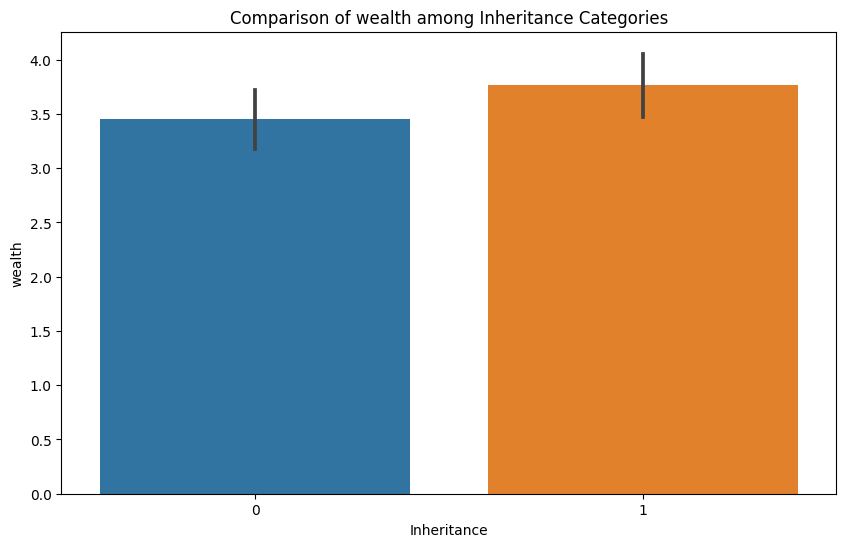

1.812921454063424e-07
Accept alternative Hypothesis


In [ ]:
inheritance = []
for item in data["wealth.how.inherited"]:
  if item == 'not inherited':
   inheritance.append(0)
  else:
    inheritance.append(1)
data['encoded_inheritance'] = inheritance

corr, p_value = stats.spearmanr(data['wealth.worth in billions'],data['encoded_inheritance'])

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="encoded_inheritance", y="wealth.worth in billions")
plt.xlabel("Inheritance")
plt.ylabel("wealth")
plt.title("Comparison of wealth among Inheritance Categories")
plt.show()

print(p_value)
if p_value < 0.05:
    print("Accept alternative Hypothesis")
else:
    print("Accept Null Hypothesis")
